In [93]:
from NSBM_functions import *

In [94]:
nbins = 100
event = 'India'
Lc_min = 0.11
Lc_max = 1.0
np.random.seed(314)
if event == 'India':
    mtarget = 740
    mkill = 10
    vkill = 3.4e3
    Q = 288.7 + REkm
    q = 267.4 + REkm
    r = 283 + REkm
    a = (Q + q) * 1000 / 2
    vr = np.sqrt(G * (Mearthkg + mtarget) * (2/(r*1000) - 1/a))
    inc = 96.6 * np.pi / 180
    omega = 17 * np.pi / 180
    
vtarget, rtarget = get_target_params(mtarget, vr, r, Q, inc, omega)
N_tot, L_mids, nums, mfrags, vfrags, vfrags, vfrags_total, eccs, SMA, AMfrags, AMfrags, Lcvals, Lcvals = vel_dis_NBM(mtarget, mkill, vkill, vtarget, 
                                                                                                                     rtarget, nbins, Lc_min, Lc_max, 
                130e6, 5000, makev=True)


[-1245.59931005   752.09134181  6500.13553492]
283.0000000000018
7598.593642757243 164.96827627231005 1425.7791509032206
7732.9610154893035
catastrophic collision
Ejected Mass initial calc:  750
first loop
N_tot: 560
M_tot:  294.02137047815165
normalizing
True
Number of debris:  1389
Total mass of debris: 772.66790609449
normalizing
True
Number of debris:  1291
Total mass of debris: 740.4932099316827
making velocities


In [103]:
(Q-q)/(2*a)

1.6000480765619389e-06

(-3.5, 4)

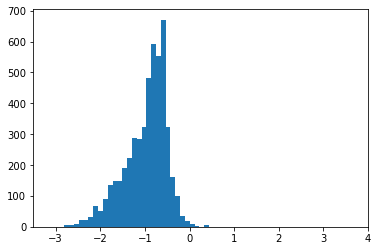

In [91]:
plt.hist(np.log10(AMfrags), bins=30);
plt.xlim(-3.5,4)

(0, 7)

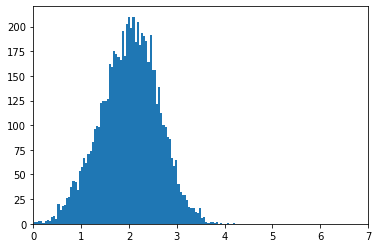

In [80]:
plt.hist(np.log10(np.linalg.norm(vfrags, axis=1)), bins=100);
plt.xlim(0, 7)

In [61]:
import numpy as np

def nsbm(Mc=1000,beta=1.71,minL=1e-2,maxL=1.,LDIV=100,LNUM=100000,flagL=1e-1,NCHIMIN=-4,NCHIMAX=4,NCHI=1000,PLOT=False):
    k = 0.1*(Mc)**0.75
    NL = k*minL**(-beta) - k*maxL**(-beta)

    LNUM = min(int(NL),LNUM)


    print("Expected number of fragments {} that are > {} m".format(NL,minL))

    minlam = np.log10(minL)
    maxlam = np.log10(maxL)

    dlam = (np.log10(maxL) - np.log10(minL) )/LDIV

#lam = np.zeros(LDIV)
#lam_edge = np.zeros((LDIV+1))

#dN = np.zeros(LDIV)

#for l in range(LDIV+1):
#  lam_edge[l] = minlam_log + dlam*l

#L_edge = 10.**(lam_edge)
#L = np.zeros(LDIV)
#pL = np.zeros(LDIV)

#for i in range(LDIV):
#   lam[i] = 0.5*(lam_edge[i]+lam_edge[i+1])
#   L[i] = 10**lam[i]
#   dN[i] = -k*(L_edge[i+1])**(-beta) + k*(L_edge[i])**(-beta)
#   pL[i] = beta*L[i]**(-(beta+1))/(minL**(-beta) - maxL**(-beta) ) * (L_edge[i+1]-L_edge[i])

    lam = np.zeros(LNUM)

    for l in range(LNUM):
      P = np.random.uniform()
      lam[l] = - np.log10( 10**(-beta*minlam) - P * (10**(-beta*minlam)-10**(-beta*maxlam)))/beta

    L = 10**(lam)

    def Pchi_lam(L,lam,NCHI,CHIMIN,CHIMAX):

       chisamp = np.linspace(CHIMIN,CHIMAX,NCHI)
       psamp = np.zeros(NCHI)
 

       def large(lam):
           if lam <= -1.95: a1 = 0.
           elif -1.95 < lam < 0.55: a1 = 0.3+0.4*(lam+1.2)
           else: a1=1.

           if lam <= -1.1: mx1 = -0.6
           elif -1.1 < lam < 0: mx1 = -0.6 -0.318*(lam+1.1)
           else: mx1 -0.95

           if lam <= -1.3: sx1 = 0.1
           elif -1.3 < lam < -0.3: sx1 = 0.1 + 0.2*(lam+1.3)
           else: sx1 = 0.3

           a2 = 1-a1

           if lam <=-0.7: mx2 = -1.2
           elif -0.7 < lam < -0.1: mx2 = -1.2 -1.333*(lam+0.7)
           else: mx2= -2.0

           if lam <= -0.5: sx2 = 0.5
           elif -0.5 < lam < -0.3: sx2 = 0.5 - (lam+0.5)
           else: sx2 = 0.3

           return a1,mx1,sx1,a2,mx2,sx2


       def small(lam):
           a1 = 1.
           a2 = 0.

           if lam<= -1.75: mx1 = -0.3
           elif -1.75 < lam < -1.25: mx1 = -0.3 - 1.4*(lam+1.75)
           else: mx1 = -1

      
           if lam <= -3.5: sx1 = 0.2
           else: sx1 = 0.2+0.1333*(lam+3.5)


           return a1,mx1,sx1,a2,0.,0.


       def alpha_trans(lam):
           lam_l = -1.09691
           lam_u = -0.9586073
           return (lam-lam_l)/(lam_u-lam_l)


       def normal(x,mu,sig):
           return (np.exp(-((x-mu)/(sig))**2/2)/(np.sqrt(2*np.pi)*sig) )

       for c in range(NCHI):

           #print("chisamp = {}".format(chisamp[c]))
           if L > 0.11: 
             a1,mx1,sx1,a2,mx2,sx2 = large(lam)
             px = a1*normal(chisamp[c],mx1,sx1)
             px+= a2*normal(chisamp[c],mx2,sx2)
           elif L < 0.08:
             a1,mx1,sx1,a2,mx2,sx2 = small(lam)
             #print(a1,mx1,sx1)
             px = a1*normal(chisamp[c],mx1,sx1)
           else:
             alam = alpha_trans(lam)
             a1l,mx1l,sx1l,a2l,mx2l,sx2l = large(lam)
             a1s,mx1s,sx1s,a2s,mx2s,sx2s = small(lam)
        
             pxl = a1l*np.random.normal(mx1l,sx1l)+a2l*np.random.normal(mx2l,sx2l)
             pxs = a1s*np.random.normal(mx1s,sx1s)

             px = pxl*alam + (1-alam)*pxs

           psamp[c]=px*1
   
       psum = np.zeros(NCHI)
       psum[0]=psamp[0]*1

       for c in range(1,NCHI):
          psum[c] = psum[c-1] + psamp[c]       
 
       norm = psum[-1]
       #print(norm)
       psum = psum/norm

       P = np.random.uniform()
       idx = np.abs(psum-P).argmin()

       return chisamp[idx]


    def vdistro(chi):
       n = len(chi)
       v=np.zeros(n)
       sig = 0.4
       for i in range(n):
           mu  = 0.9*chi[i] + 2.9
           v[i] = np.random.normal(mu,sig)
       return v

    chi=np.zeros(LNUM)
    for i in range(LNUM):
       chi[i] = Pchi_lam(L[i],lam[i],NCHI,NCHIMIN,NCHIMAX)

    deltav_log = vdistro(chi)
    deltav = 10**deltav_log
    #print(deltav)

    flag = L > flagL

    print("Number of L > {} is {}".format(np.sum(flag),flagL))

    if PLOT:
        hc,edgesc = np.histogram(chi[flag],100)
        hv,edgesv = np.histogram(deltav_log[flag],100)

        import matplotlib.pylab as plt

        plt.figure()
        plt.step(edgesc[0:-1],hc)
        plt.xlabel(r"Chi [log10 A/M($m^2/kg$)] ")
        plt.ylabel("Number")
        plt.xlim(-3,2)
        plt.savefig("distro_chi.png",dpi=300)

        plt.figure()
        plt.step(edgesv[0:-1],hv)
        plt.xlabel(r"Log10 Delta V(m/s)")
        plt.ylabel("Number")
        plt.xlim(-1,4)
        plt.savefig("distro_v.png",dpi=300)

        plt.show()

    return deltav,chi,L

#print(NL,np.sum(dN),np.sum(pL))
   


In [63]:
import matplotlib.pylab as plt
import numpy as np

Re=6378
Rcutoff = Re+200
Rhigh = 42000
Q=( 290+Re)*1e3
rStrike = (290+Re)*1e3
minL=0.01
SEED=314
NCHI=10000
Mc=740.


GM=6.67e-11*5.974e24

VQ = np.sqrt(GM/Q)

def vtheta(nu,a,ecc,GM):
  return np.sqrt(GM/(a*(1-ecc*ecc)))*(1+ecc*np.cos(nu))   


def vrad(nu,a,ecc,GM):
  return np.sqrt(GM/(a*(1-ecc*ecc)))*ecc*np.sin(nu)

def radius(nu,a,ecc):
   return a*(1-ecc*ecc)/(1+ecc*np.cos(nu))

def sma(v,GM,r):
    v2 = (v[0]*v[0]+v[1]*v[1]+v[2]*v[2])
    return GM*r/(2*GM-v2*r)

def eccVector(v,GM,r):
    v = np.array(v)
    r = np.array(r)
    v2 = (v[0]*v[0]+v[1]*v[1]+v[2]*v[2])
    rdotv = r[0]*v[0]+r[1]*v[1]+r[2]*v[2]
    rmag = np.sqrt(r[0]*r[0]+r[1]*r[1]+r[2]*r[2])
    return (v2/GM - 1/rmag)*r - rdotv/GM*v

def period(a,GM):
    return 2*np.pi*np.sqrt(a**3/GM)

def dNdl(l0,l1,M,BINS):
    BINS=int(BINS)
    dN=np.zeros(BINS)
    dM=np.zeros(BINS)
    edges = 10**(np.log10(l0)+(np.log10(l1)-np.log10(l0))/BINS*np.array(range(0,BINS+1)))
    cum=0
    mass=0
    for i in range(BINS):
      dN[i] = -0.171*M**0.75*(edges[i+1]**(-2.71)-edges[i]**-2.71)
      dM[i]=2700*dN[i]*(edges[i+1]+edges[i])**3*np.pi/48
      mass+=dM[i]
      cum+=dN[i]
    cum=cum*M/mass
    dN=dN*M/mass
    dM=dM*M/mass
    return dN,dM,edges,cum,M

np.random.seed(SEED)

deltaV,chi,L = nsbm(minL=minL,NCHI=NCHI,Mc=Mc,PLOT=True)


Expected number of fragments 37304.278457473316 that are > 0.01 m


KeyboardInterrupt: 

Initial SMA 6668.0 km or altitude 290.0 km and ecc -2.220446049250313e-16
At strike DNU 1.5707963267948966 NU 4.71238898038469 altitude 290.0 km VT 7.730324599673467 km/s VR 1.7164768716767458e-15 km/s, V 7.730324599673467 km/s
Total that suffer immediate de-orbit 297 
Total number in cutoff range is 407 out of 713
Total number with Q < 20000 km 407 out of 407


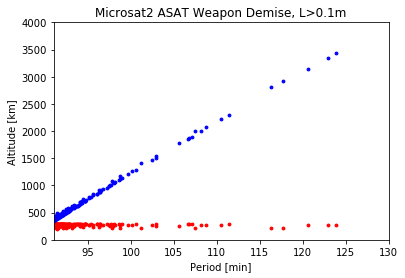

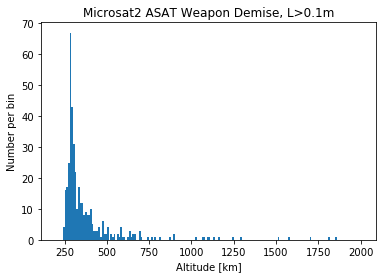

In [27]:

ecc = 1 - VQ**2*Q/GM

a0 = Q*GM/(2*GM-VQ**2*Q)

print("Initial SMA {} km or altitude {} km and ecc {}".format(a0/1e3,a0/1e3-Re,ecc))

nu = np.arccos( (a0*(1-ecc*ecc)/rStrike - 1)/ecc )

if nu < np.pi: 
   dnu = np.pi-nu
   nu = np.pi+dnu
else: dnu=nu-np.pi


vt = vtheta(nu,a0,ecc,GM)
vr = vrad(nu,a0,ecc,GM)

print("At strike DNU {} NU {} altitude {} km VT {} km/s VR {} km/s, V {} km/s".format(dnu,nu,radius(nu,a0,ecc)/1e3-Re,vt/1e3,vr/1e3,np.sqrt(vr*vr+vt*vt)/1e3))


colat = nu-np.pi

vy0 = vr*np.cos(colat) - vt*np.sin(colat)
vx0 = vr*np.sin(colat) + vt*np.cos(colat)
vz0 = 0

r0 = radius(nu,a0,ecc)

x0 = r0*np.sin(colat) 
y0 = r0*np.cos(colat)
z0 = 0

NPERT = len(deltaV)


#### WRONG
#dvx = np.random.uniform(-1,1,NPERT)
#dvy = np.random.uniform(-1,1,NPERT)
#dvz = np.random.uniform(-1,1,NPERT)
#
#### CORRECT for spherical distro
#costheta = np.random.uniform(-1,1,NPERT)
#theta = np.arccos(costheta)
#phi = np.random.uniform(0,1,NPERT)*2*np.pi
#I = np.arange(0,NPERT,1)
#Gratio = (1+np.sqrt(5))/2
#theta = np.arccos(2*I/(NPERT)-1)
#phi = 2*np.pi*I/Gratio
#dvx = np.cos(phi)*np.sin(theta) 
#dvy = np.sin(phi)*np.sin(theta)
#dvz = np.cos(theta)
####
#### AWESOME
dvx = np.random.normal(0,1,NPERT)
dvy = np.random.normal(0,1,NPERT)
dvz = np.random.normal(0,1,NPERT)
####

norms = np.sqrt(dvx**2+dvy**2+dvz**2)

vx = vx0 + dvx/norms*deltaV
vy = vy0 + dvy/norms*deltaV
vz = vz0 + dvz/norms*deltaV

eccFrags=np.zeros(NPERT)
smaFrags=np.zeros(NPERT)
periods=np.zeros(NPERT)
for i in range(NPERT):
   v=[vx[i],vy[i],vz[i]]
   x=[x0,y0,z0]
   eccVecs = eccVector(v,GM,x)
   eccFrags[i] = np.sqrt(eccVecs[0]**2+eccVecs[1]**2+eccVecs[2]**2)
   smaFrags[i] = sma(v,GM,r0)
   if smaFrags[i]<0: continue
   periods[i]=period(smaFrags[i],GM)/60

q = smaFrags*(1-eccFrags)
Q = smaFrags*(1+eccFrags)
plt.figure()
flag0 = (q/1e3<Rcutoff) 
print("Total that suffer immediate de-orbit {} ".format(np.sum(flag0)))
flag = (q/1e3>Rcutoff) & (Q/1e3>Rcutoff) & (Q/1e3<Rhigh)
print("Total number in cutoff range is {} out of {}".format(np.sum(flag),len(flag)))
plt.ylim(0,4000)
plt.xlim(91,130)
plt.xlabel("Period [min]")
plt.ylabel("Altitude [km]")
perLEO = periods[flag]
qLEO = q[flag]/1e3-Re
QLEO = Q[flag]/1e3-Re
aLEO = smaFrags[flag]/1e3-Re

flag = QLEO < 20000
print("Total number with Q < 20000 km {} out of {}".format(np.sum(flag),len(flag)))
plt.scatter(perLEO[flag],qLEO[flag],s=8,c="red")
plt.scatter(perLEO[flag],QLEO[flag],s=8,c="blue")
plt.title("Microsat2 ASAT Weapon Demise, L>0.1m")
#plt.savefig("radarsat2_L0p01_gabbard.png",dpi=300)

bins=range(200,2001,10)
plt.figure()
plt.hist(aLEO,bins=bins)
plt.ylabel("Number per bin")
plt.xlabel("Altitude [km]")
plt.title("Microsat2 ASAT Weapon Demise, L>0.1m")
#plt.savefig("radarsat2_L0p01_smahist.png",dpi=300)



plt.show()




